In [63]:
save_dats_dir = '/Users/jnaiman/Dropbox/wwt_image_extraction/OCRPostCorrection/paper1/dats/'

In [17]:
from glob import glob
import pandas as pd
import fastwer
import numpy as np
import matplotlib.pyplot as plt

## Batch inference byt5 -- only words, arXiv dataset

In [89]:
# only words, byt5
output_dir_inf = '/Users/jnaiman/Dropbox/wwt_image_extraction/OCRPostCorrection/inferences/latex/'

ender = '_small_words' # 100k for training, 5k val

In [90]:
inf_files = glob(output_dir_inf + '*'+ender+'.csv')
inf_files.sort()
for i,f in enumerate(inf_files):
    d = pd.read_csv(f)
    if i == 0: # first
        df_byt5_words = d.copy()
    else: # others
        df_byt5_words = pd.concat([df_byt5_words,d],ignore_index=True)

In [91]:
df_byt5_words.head()

,aligned sentences source,aligned sentences target,sentences source,sentences target,aligned sentences source types,aligned sentences target types,sentences source types,sentences target types,words source aligned,words target aligned,input_text,target_text,predicted_text
0,Thev suegested that optical {lis [rom the neu...,They suggested that optical flux from the neu...,Thev suegested that optical {lis [rom the neu...,They suggested that optical flux from the neu...,WWWW WWWWWWWWW WWWW WWWWWWW WWWW WWWW WWW WWW...,WWWW WWWWWWWWW WWWW WWWWWWW WWWW WWWW WWW WWW...,WWWW WWWWWWWWW WWWW WWWWWWW WWWW WWWW WWW WWW...,WWWW WWWWWWWWW WWWW WWWWWWW WWWW WWWW WWW WWW...,Thev suegested that optical {lis [rom the neu...,They suggested that optical flux from the neu...,Thev suegested that optical {lis [rom the neu...,They suggested that optical flux from the neu...,They suggested that optical flux from the neu...
1,dust. temperatures of 35. 40. 45 and SOWKK are...,"dust@ temperatures of 35, 40, 45 and @@@K@ are...",dust. temperatures of 35. 40. 45 and SOWKK are...,"dust temperatures of 35, 40, 45 and K are abou...",WWWWW WWWWWWWWWWWW WW WWW WWW WW WWW WWWWW WWW...,WWWW@ WWWWWWWWWWWW WW WWW WWW WW WWW @@@W@ WWW...,WWWWW WWWWWWWWWWWW WW WWW WWW WW WWW WWWWW WWW...,WWWW WWWWWWWWWWWW WW WWW WWW WW WWW W WWW WWWW...,dust. temperatures of 35. 40. 45 and KK are ab...,"dust@ temperatures of 35, 40, 45 and K@ are ab...",dust. temperatures of 35. 40. 45 and KK are ab...,"dust temperatures of 35, 40, 45 and K are abou...","dust temperatures of 35, 40, 45 and K are abou..."
2,| comparison between the two panels demonstra...,A comparison between the two panels demonstra...,| comparison between the two panels demonstra...,A comparison between the two panels demonstra...,W WWWWWWWWWW WWWWWWW WWW WWW WWWWWW WWWWWWWWW...,W WWWWWWWWWW WWWWWWW WWW WWW WWWWWW WWWWWWWWW...,W WWWWWWWWWW WWWWWWW WWW WWW WWWWWW WWWWWWWWW...,W WWWWWWWWWW WWWWWWW WWW WWW WWWWWW WWWWWWWWW...,| comparison between the two panels demonstra...,A comparison between the two panels demonstra...,| comparison between the two panels demonstra...,A comparison between the two panels demonstra...,A comparison between the two panels demonstra...
3,Then. equation ^^^^^^^^^^^(7)^) aud equation ...,"Then, equation \ref{con_ang}) ) and equation ...",Then. equation (7)) aud equation (3)) can be ...,"Then, equation \ref{con_ang}) ) and equation ...",WWWWW WWWWWWWW ^^^^^^^^^^^WWW^W WWW WWWWWWWW ...,WWWWW WWWWWWWW RRRRRRRRRRRRRW W WWW WWWWWWWW ...,WWWWW WWWWWWWW WWWW WWW WWWWWWWW WWWW WWW WW ...,WWWWW WWWWWWWW RRRRRRRRRRRRRW W WWW WWWWWWWW ...,Then. equation )@) aud equation )@) can be so...,"Then, equation ) ) and equation ) ) can be so...",Then. equation )) aud equation )) can be solv...,"Then, equation ) ) and equation ) ) can be so...","Then, equation ) ) and equation ) ) can be so..."
4,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,WW WWWW WWWWWWWWW W WWWWWW WWWWW WW WWWWWWWW ...,WW WWWW WWWWWWWWW W WWWWWW WWWWW WW WWWWWWWW ...,WW WWWW WWWWWWWWW W WWWWWW WWWWW WW WWWWWWWW ...,WW WWWW WWWWWWWWW W WWWWWW WWWWW WW WWWWWWWW ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...,We have developed a simple model to estimate ...


In [99]:
# input_text = OCR source in
# target_text = ground truth 
# predicted_text = predicted OCR text
cer_before = []; cer_after = []
wer_before = []; wer_after = []
for i in range(len(df_byt5_words)):
    d = df_byt5_words.iloc[i]
    # before
    if not pd.isnull(d['input_text']) and not pd.isnull(d['target_text']) and not pd.isnull(d['predicted_text']):
        # also, for ints/floats that got read in
        input_text = str(d['input_text'])
        target_text = str(d['target_text'])
        predicted_text = str(d['predicted_text'])
        cbefore = fastwer.score_sent(input_text,
                                     target_text,
                                     char_level=True)
        wbefore = fastwer.score_sent(input_text,
                                     target_text,
                                     char_level=False)
        # after
        cafter = fastwer.score_sent(predicted_text,
                                     target_text,
                                     char_level=True)
        wafter = fastwer.score_sent(predicted_text,
                                     target_text,
                                     char_level=False)
    else:
        cbefore = np.nan
        wbefore = np.nan
        cafter = np.nan
        wafter = np.nan
    
    cer_before.append(cbefore)
    wer_before.append(wbefore)
    cer_after.append(cafter)
    wer_after.append(wafter)

df_byt5_words['CER Before'] = cer_before
df_byt5_words['WER Before'] = wer_before
df_byt5_words['CER After'] = cer_after
df_byt5_words['WER After'] = wer_after

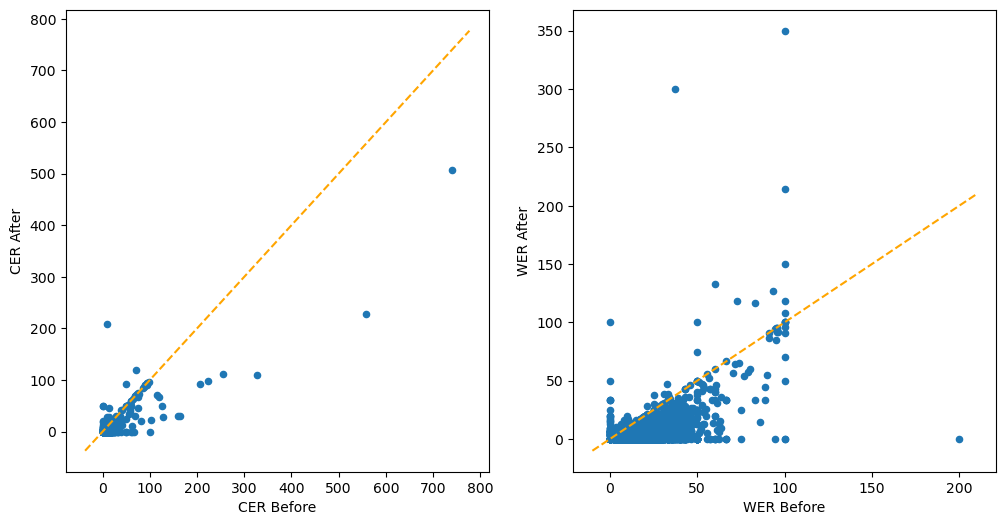

In [100]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
df_byt5_words.plot(x = 'CER Before', y = 'CER After', kind='scatter',ax=ax[0])
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
ax[0].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

df_byt5_words.plot(x = 'WER Before', y = 'WER After', kind='scatter',ax=ax[1])
xlim = ax[1].get_xlim()
ylim = ax[1].get_ylim()
ax[1].plot([xlim[0],xlim[1]], [xlim[0],xlim[1]], '--', color='orange')

plt.show()

In [101]:
def get_iqr(col):
    colvalue = df_byt5_words[col]
    colvalue = colvalue[~np.isnan(colvalue)]
    Q3 = np.quantile(colvalue, 0.75)
    Q1 = np.quantile(colvalue, 0.25)
    IQR = Q3 - Q1
    return IQR

In [102]:
def get_iqr_by_value(colvalue):
    Q3 = np.quantile(colvalue, 0.75)
    Q1 = np.quantile(colvalue, 0.25)
    IQR = Q3 - Q1
    return IQR

In [103]:
def get_stats(col, round_val = 2, print_nans=False):
    colvalue = df_byt5_words[col]
    colvalue = colvalue[~np.isnan(colvalue)]
    # how many nan's
    if print_nans: print('# NaNs =', len(df_byt5_words[col])-len(colvalue))
    med = colvalue.median()
    mea = colvalue.mean()
    std = colvalue.std()
    iqr = get_iqr_by_value(colvalue)
    return round(mea,round_val), round(med,round_val), round(std,round_val), round(iqr,round_val)

In [104]:
def get_improvement_stats(col_before, col_after, round_val = 2):
    colvalueb = df_byt5_words[col_before]
    colvalueb = colvalueb[~np.isnan(colvalueb)]
    colvaluea = df_byt5_words[col_after]
    colvaluea = colvaluea[~np.isnan(colvaluea)]
    mask = colvalueb != 0
    colvalue = 100*(1-colvaluea[mask]/colvalueb[mask])
    med = colvalue.median()
    mea = colvalue.mean()
    std = colvalue.std()
    iqr = get_iqr_by_value(colvalue)
    return round(mea,round_val), round(med,round_val), round(std,round_val), round(iqr,round_val)    

In [105]:
def save_dat(fname,data,formatting = None):
    if formatting is not None:
        all_arts = "{:,}".format(successful_align_pages)
    else:
        all_arts = data
    with open(fname, 'w') as f:
        print(all_arts, file=f,end='')

In [106]:
print('--------- Before -------------')
mea_cbefore,med_cbefore,std_cbefore,iqr_cbefore = get_stats('CER Before', print_nans=True)
print('CER : mean =', mea_cbefore, ', std =', std_cbefore, ', median =',med_cbefore, ', iqr =', iqr_cbefore)
mea_wbefore,med_wbefore,std_wbefore,iqr_wbefore = get_stats('WER Before')
print('WER : mean =', mea_wbefore, ', std =', std_wbefore, ', median =',med_wbefore, ', iqr =', iqr_wbefore)
print('')
print('--------- After -------------')
mea_cafter,med_cafter,std_cafter,iqr_cafter = get_stats('CER After')
print('CER : mean =', mea_cafter, ', std =', std_cafter, ', median =',med_cafter, ', iqr =', iqr_cafter)
mea_wafter,med_wafter,std_wafter,iqr_wafter = get_stats('WER After')
print('WER : mean =', mea_wafter, ', std =', std_wafter, ', median =',med_wafter, ', iqr =', iqr_wafter)
print('')
# improvement
#improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
mea_c,med_c,std_c,iqr_c = get_improvement_stats('CER Before', 'CER After')
print('------------ Improvement ----------------')
print('CER : mean = ', mea_c, ', std =', std_c, ', median =',med_c, ', iqr =', iqr_c)
mea_w,med_w,std_w,iqr_w = get_improvement_stats('WER Before', 'WER After')
print('WER : mean = ', mea_w, ', std =', std_w, ', median =',med_w, ', iqr =', iqr_w)

# save all of these

--------- Before -------------
# NaNs = 2
CER : mean = 5.5 , std = 17.46 , median = 3.01 , iqr = 5.22
WER : mean = 15.34 , std = 14.53 , median = 13.04 , iqr = 17.46

--------- After -------------
CER : mean = 2.08 , std = 11.16 , median = 0.0 , iqr = 1.31
WER : mean = 4.18 , std = 12.17 , median = 0.0 , iqr = 5.0

------------ Improvement ----------------
CER : mean =  75.6 , std = 54.01 , median = 100.0 , iqr = 36.44
WER : mean =  78.06 , std = 34.36 , median = 100.0 , iqr = 33.33


In [107]:
# save everything
dats = [mea_cbefore,mea_wbefore,mea_cafter,mea_wafter,
        mea_c,mea_w]
names_start = 'byt5_onlyWords_small'
datnames = ['mean_cer_before','mean_wer_before','mean_cer_after','mean_wer_after',
            'mean_cer_imp','mean_wer_imp']
for d,n in zip(dats,datnames):
    save_dat(save_dats_dir+names_start+n+'.dat',d)